In [1]:
import os

In [2]:
# Load Images
# Data Directory
data_dir = '../data/frames'
# List directories in real and fake
emotions = os.listdir(data_dir)

emotions.remove('.DS_Store')

# Remove .DS_Store from every emotion folder
for emotion in emotions:
    if '.DS_Store' in os.listdir(data_dir + "/" + emotion):
        os.remove(data_dir + "/" + emotion + "/" + '.DS_Store')
        print("Removed .DS_Store from: ", emotion)


# Count the number of emotions

print("Number of emotions: ", len(emotions))
# Count the number of images in each emotion
for emotion in emotions:
    print("\tNumber of images in {} is: {}".format(emotion, len(os.listdir(data_dir + "/" + emotion))))



Number of emotions:  12
	Number of images in fake_surprise is: 5187
	Number of images in fake_contempt is: 5689
	Number of images in fake_disgust is: 5524
	Number of images in fake_sad is: 5281
	Number of images in fake_happy is: 4937
	Number of images in real_happy is: 5348
	Number of images in real_surprise is: 5438
	Number of images in real_disgust is: 5307
	Number of images in real_angry is: 5402
	Number of images in real_contempt is: 5222
	Number of images in real_sad is: 5407
	Number of images in fake_angry is: 5850


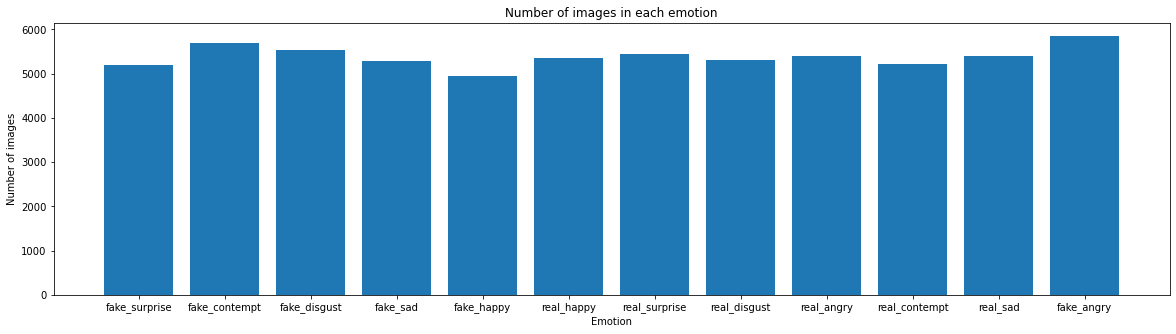

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.bar(emotions, [len(os.listdir(data_dir + "/" + emotion)) for emotion in emotions])
plt.title("Number of images in each emotion")
plt.xlabel("Emotion")
plt.ylabel("Number of images")
plt.show()

# Face detection 

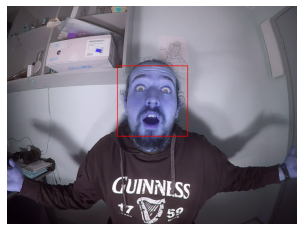

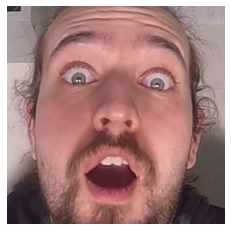

In [6]:
# Data Preprocessing to detect faces
import cv2

# Load the cascade
face_cascade = cv2.CascadeClassifier('../haarcascade_frontalface_default.xml')

# Read the input image
# img = cv2.imread('../data/frames/fake_angry/H2N2A.MP4Ahmed321.jpg')

img = cv2.imread('/Users/dim__gag/git/Genuine_Posed_EmotionRecognition/data/frames/fake_surprise/D2N2SUR.MP4Anton196.jpg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image
gray = cv2.GaussianBlur(gray, (25, 25), 0)


# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)


# Display the output
plt.imshow(img)
plt.axis("off")
plt.show()


for (x, y, w, h) in faces:
    faces = img[y+2:y+h-1, x+2:x+w-1]
    faces = cv2.cvtColor(faces, cv2.COLOR_BGR2RGB)
    plt.imshow(faces)
    plt.axis("off")
    plt.show()

In [4]:
# Try this for all images in real_surprise
# Data Directory
data_dir = '../data/frames'

import cv2
import os
from skimage import filters

# Make directory for croped images if it doesn't exist
if not os.path.exists('/Users/dim__gag/Desktop/croped_images_real_surprise'):
    os.makedirs('/Users/dim__gag/Desktop/croped_images_real_surprise')

# # Load the cascade
# face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "../haarcascade_frontalface_default.xml") #Note the change
# face_cascade = cv2.CascadeClassifier('../haarcascade_frontalface_default.xml')

# Load cascade alternative
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "../haarcascade_frontalface_alt2.xml") #Note the change
face_cascade = cv2.CascadeClassifier('../haarcascade_frontalface_alt2.xml')

# Read the input image
for image in (os.listdir(data_dir + "/" + "real_surprise")):
    img = cv2.imread(data_dir + "/" + "real_surprise" + "/" + image)
    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Blur the image
    gray = cv2.GaussianBlur(gray, (25, 25), 0)
    
    # Sharpen the image
    # gray = filters.unsharp_mask(gray, radius=3, amount=2)
    

    # Detect faces and crop images to faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        faces = img[y+2:y+h-1, x+2:x+w-1]
        faces = cv2.cvtColor(faces, cv2.COLOR_BGR2RGB)
        # plt.imshow(faces)
        # plt.axis("off")
        # plt.show()
        cv2.imwrite('/Users/dim__gag/Desktop/croped_images_real_surprise/' + image, cv2.cvtColor(faces, cv2.COLOR_RGB2BGR))




[ERROR:0@311.707] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/core/src/persistence.cpp (505) open Can't open file: '/Users/dim__gag/opt/anaconda3/lib/python3.9/site-packages/cv2/data/../haarcascade_frontalface_alt2.xml' in read mode


In [6]:
# Count the number of images in ea

crope_dir = '/Users/dim__gag/Desktop/croped_images_real_surprise'

print("Number of images in croped_images_real_surprise: ", len(os.listdir(crope_dir)))

# Number of original directory
print("Number of images in real_surprise: ", len(os.listdir(data_dir + "/" + "real_surprise")))

Number of images in croped_images_real_surprise:  5282
Number of images in real_surprise:  5438


In [ ]:
# Make this in one single python file...